In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment =None
df = pd.read_csv('C:/Users/emery/Desktop/Data Analyse with Py/CSV/movies.csv')


In [5]:
#calculate the empty rate of each columns
for col_name in df.columns:
    pct_missing = np.mean(df[col_name].isnull())
    print('{}-{}%'.format(col_name,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [7]:
#drop the empty rows
df = df.dropna()

In [12]:
#change the data type from float64 to int64
df.dtypes
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
#get the correct released year
df['corrected_year']= df['released'].str.split(' ').str[-3]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


Text(0, 0.5, 'gross')

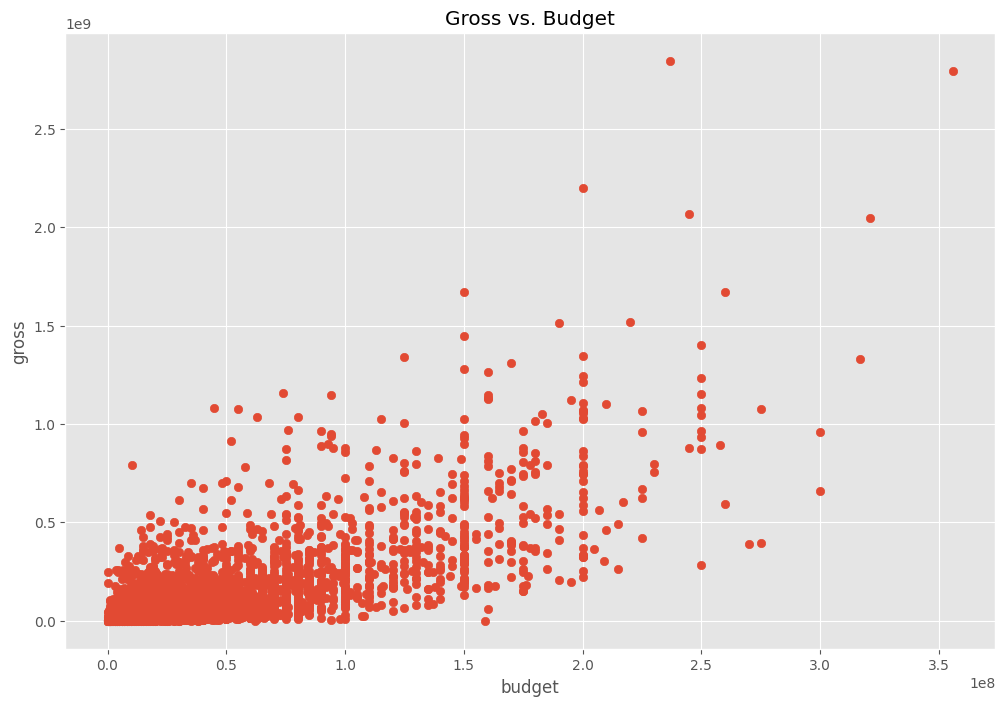

In [13]:
#use matplotlib to draw gross vs budget, add the labels and title
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Gross vs. Budget')
plt.xlabel('budget')
plt.ylabel('gross')

Text(0, 0.5, 'gross')

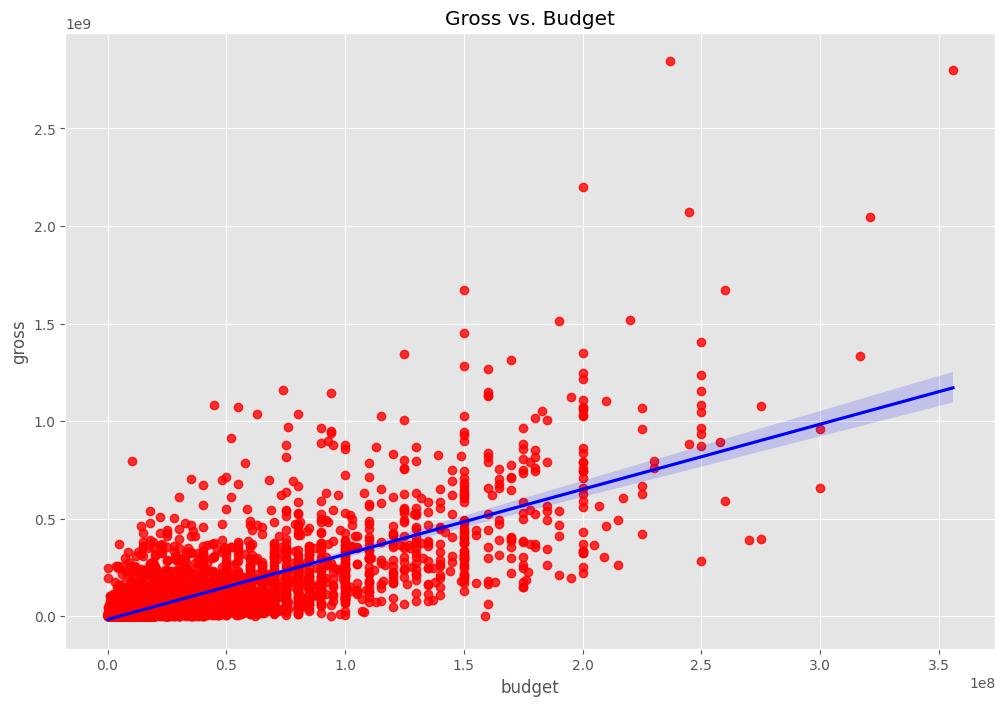

In [14]:
#using seaborn to plot the regression
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Gross vs. Budget')
plt.xlabel('budget')
plt.ylabel('gross')

Text(120.72222222222221, 0.5, 'gross')

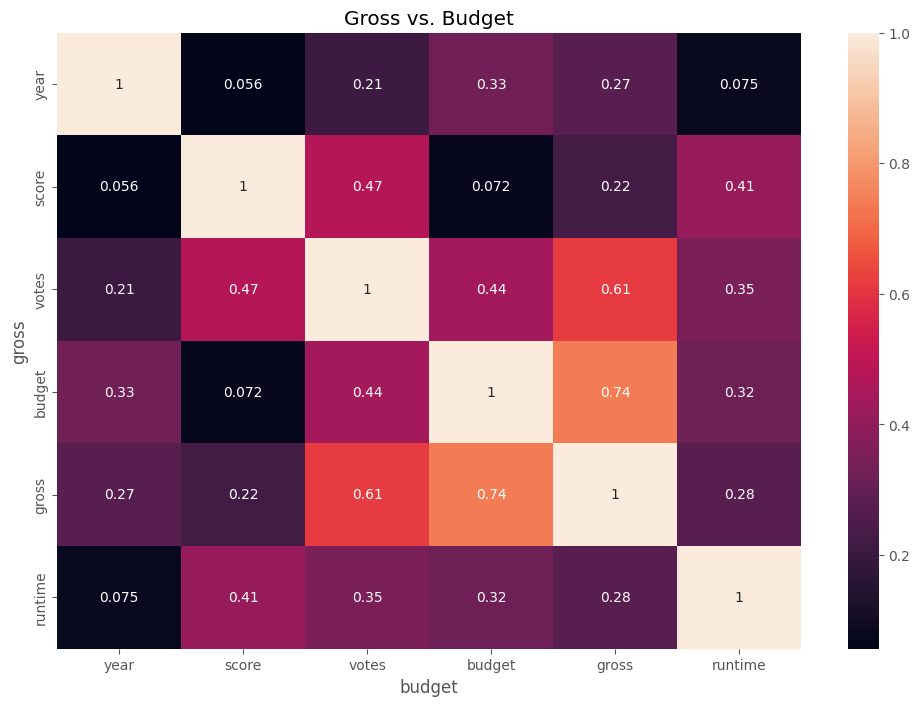

In [16]:
#using seaborn to create heatmap
number_columns = df.select_dtypes(include='number')
sns.heatmap(number_columns.corr(), annot=True)
plt.title('Correlation of budget and gross')
plt.xlabel('budget')
plt.ylabel('gross')

In [21]:
#numerize 'object' type 
numerized_df = df
for col_name in numerized_df:
    if(numerized_df[col_name].dtype == 'object'):
        numerized_df[col_name] = numerized_df[col_name].astype('category')
        numerized_df[col_name] = numerized_df[col_name].cat.codes

In [31]:
#unstack the pairs, sort it and find the pairs > 0.5
num_corr = numerized_df.corr()
corr_pairs = num_corr.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr=sorted_pairs[sorted_pairs > 0.5]
print(high_corr)


votes           gross             0.614751
gross           votes             0.614751
budget          gross             0.740247
gross           budget            0.740247
year            corrected_year    0.881057
corrected_year  year              0.881057
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64
